Imports

In [28]:
import subprocess
import pandas as pd
from pandas.io.json import json_normalize

Data frame loading

In [29]:
csv_reader = pd.read_csv('videos.csv', chunksize=64)
df = next(csv_reader)
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,17.14.11,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,17.14.11,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,17.14.11,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,17.14.11,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,17.14.11,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...


Loading categories names

In [30]:
category_names = json_normalize(pd.read_json('category_id.json')['items']).filter(['id', 'snippet.title']).set_index('id')
category_names.index = category_names.index.astype('int64')
category_names

,snippet.title
id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging


Group by and Sum by category

In [31]:
categories = df.groupby('category_id').agg(**{
    'Videos': ('video_id', 'count'),
    'Views': ('views', 'sum'),
    'Likes': ('likes', 'sum'),
    'Dislikes': ('dislikes', 'sum'),
    'Total comments': ('comment_count', 'sum'),
})
categories

,Videos,Views,Likes,Dislikes,Total comments
category_id,,,,,
1,4,224611,10093,915,1510
2,3,692738,31351,1553,3060
10,1,19372,1093,51,146
15,1,297604,16641,537,1353
17,3,591712,29022,1093,3598
20,1,285049,25939,446,987
22,18,2241242,105417,15824,15225
23,7,2207829,110087,37278,16591
24,13,3707835,251585,9456,86707


Left join

In [32]:
merged = pd.merge(category_names, categories, left_index=True, right_index=True, how='left')
merged = merged.set_index('snippet.title')
merged

,Videos,Views,Likes,Dislikes,Total comments
snippet.title,,,,,
Film & Animation,4.0,224611.0,10093.0,915.0,1510.0
Autos & Vehicles,3.0,692738.0,31351.0,1553.0,3060.0
Music,1.0,19372.0,1093.0,51.0,146.0
Pets & Animals,1.0,297604.0,16641.0,537.0,1353.0
Sports,3.0,591712.0,29022.0,1093.0,3598.0
Short Movies,NaN,NaN,NaN,NaN,NaN
Travel & Events,NaN,NaN,NaN,NaN,NaN
Gaming,1.0,285049.0,25939.0,446.0,987.0
Videoblogging,NaN,NaN,NaN,NaN,NaN


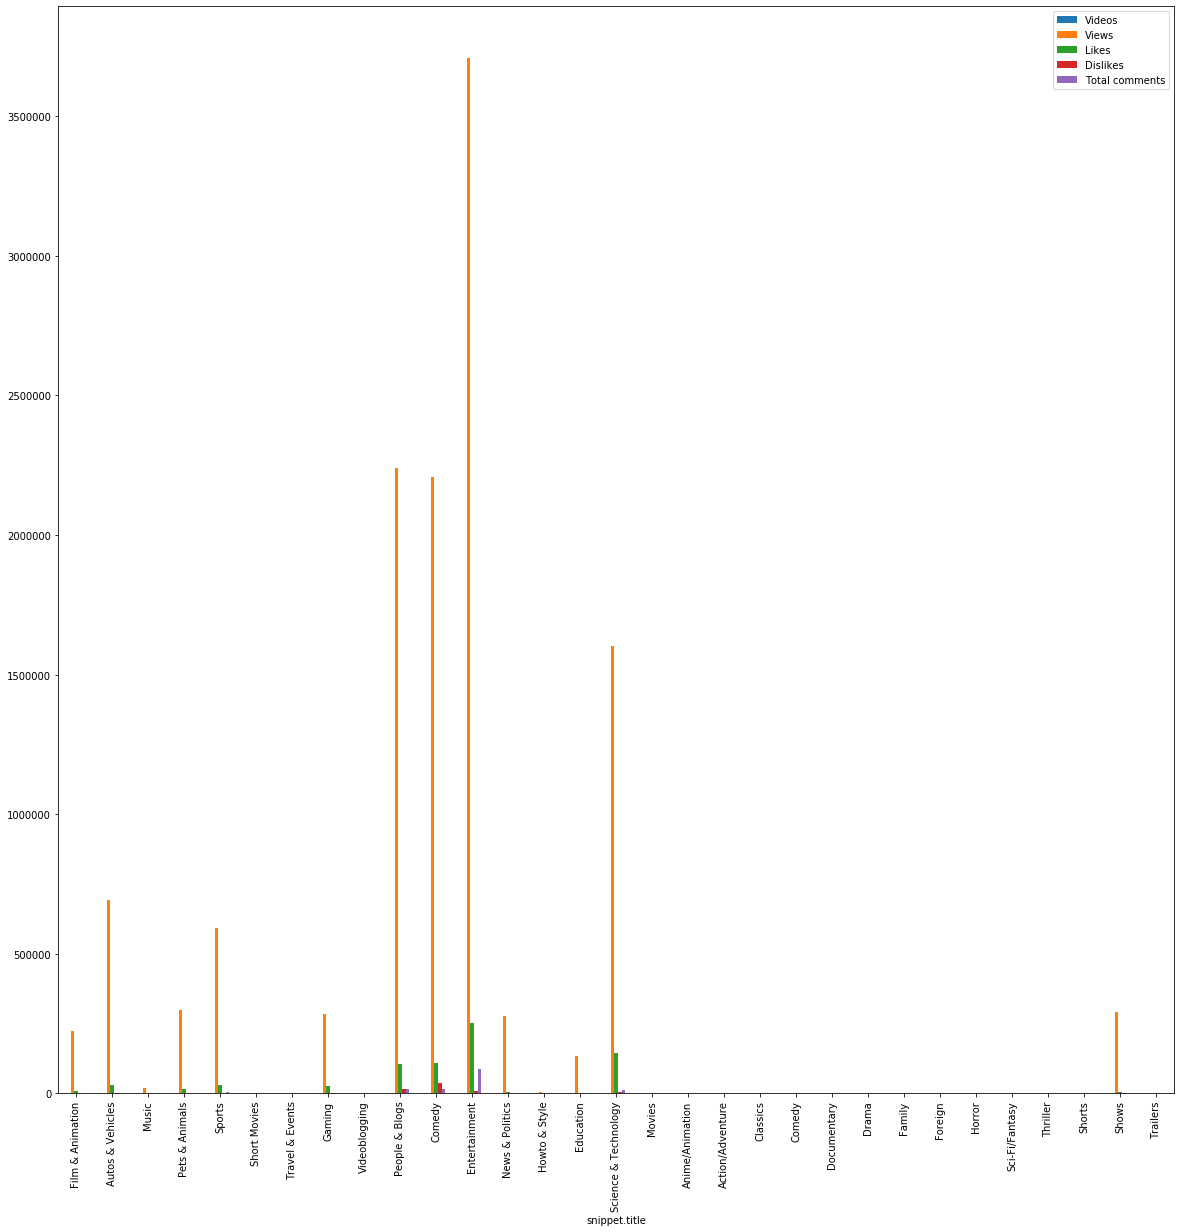

In [33]:
merged.plot(kind='bar', figsize=(20,20))